In [5]:
!pip install requests beautifulsoup4 pandas pymongo dnspython


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pymongo

In [8]:
# 1. Import bibliotek
import requests
from bs4 import BeautifulSoup

# 2. URL strony do scrapowania
url = 'https://books.toscrape.com/'

# 3. Pobieramy zawartość strony
response = requests.get(url)
html = response.text  # lub: response.content

# 4. Parsujemy HTML z BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# 5. Znajdujemy wszystkie elementy zawierające tytuły książek
# Każdy tytuł jest w tagu <h3> zagnieżdżonym w <article class="product_pod">
book_elements = soup.find_all('article', class_='product_pod')

# 6. Wyciągamy same tytuły
titles = []
for book in book_elements:
    title = book.h3.a['title']  # atrybut title zawiera pełny tytuł
    titles.append(title)

# 7. Wyświetlamy listę tytułów
for t in titles:
    print(t)


A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [9]:
import pandas as pd

# 1. Tworzymy DataFrame z listy tytułów
df = pd.DataFrame({'Title': titles})

# 2. Zapisujemy do pliku CSV
df.to_csv('book_titles.csv', index=False)

# 3. Potwierdzenie
print("Zapisano do pliku book_titles.csv")



Zapisano do pliku book_titles.csv


In [10]:
# 1. Lista do przechowywania wszystkich danych
books = []

# 2. Przechodzimy po każdym elemencie książki
for book in book_elements:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text  # np. '£53.74'

    # Ocena jest ukryta jako klasa, np. <p class="star-rating Three">
    rating_tag = book.find('p', class_='star-rating')
    rating_class = rating_tag['class']  # np. ['star-rating', 'Three']
    rating = rating_class[1]  # Drugi element to słowna ocena

    # Zapisujemy jako słownik
    books.append({
        'Title': title,
        'Price': price,
        'Rating': rating
    })

# 3. Tworzymy DataFrame i zapisujemy do CSV
df = pd.DataFrame(books)
df.to_csv('books_with_prices_and_ratings.csv', index=False)

# 4. Potwierdzenie
print("Zapisano dane z cenami i ocenami!")
df.head()  # pokazujemy kilka pierwszych wierszy


Zapisano dane z cenami i ocenami!


,Title,Price,Rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five


In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

all_books = []

# Przechodzimy przez 50 stron (1 do 50)
for page in range(1, 51):
    url = f'https://books.toscrape.com/catalogue/page-{page}.html'
    print(f'Pobieranie: {url}')

    response = requests.get(url)
    response.encoding = 'utf-8'  # 👈 Dodane
    soup = BeautifulSoup(response.text, 'html.parser')

    # Znajdź książki na stronie
    book_elements = soup.find_all('article', class_='product_pod')

    # 👇 Wszystko to musi być W ŚRODKU pętli
    for book in book_elements:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating = book.find('p', class_='star-rating')['class'][1]

        all_books.append({
            'Title': title,
            'Price': price,
            'Rating': rating
        })

# Zapisujemy wszystko do CSV
df = pd.DataFrame(all_books)
df.to_csv('all_books.csv', index=False)

print(f'Zapisano {len(df)} książek do all_books.csv')


Pobieranie: https://books.toscrape.com/catalogue/page-1.html
Pobieranie: https://books.toscrape.com/catalogue/page-2.html
Pobieranie: https://books.toscrape.com/catalogue/page-3.html
Pobieranie: https://books.toscrape.com/catalogue/page-4.html
Pobieranie: https://books.toscrape.com/catalogue/page-5.html
Pobieranie: https://books.toscrape.com/catalogue/page-6.html
Pobieranie: https://books.toscrape.com/catalogue/page-7.html
Pobieranie: https://books.toscrape.com/catalogue/page-8.html
Pobieranie: https://books.toscrape.com/catalogue/page-9.html
Pobieranie: https://books.toscrape.com/catalogue/page-10.html
Pobieranie: https://books.toscrape.com/catalogue/page-11.html
Pobieranie: https://books.toscrape.com/catalogue/page-12.html
Pobieranie: https://books.toscrape.com/catalogue/page-13.html
Pobieranie: https://books.toscrape.com/catalogue/page-14.html
Pobieranie: https://books.toscrape.com/catalogue/page-15.html
Pobieranie: https://books.toscrape.com/catalogue/page-16.html
Pobieranie: https

In [25]:
import pandas as pd

# Wczytujemy plik CSV
df = pd.read_csv('all_books.csv')

# Podgląd
df.head()


,Title,Price,Rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five


In [26]:
# Usuwamy znak funta i zamieniamy na float
df['Price'] = df['Price'].str.replace('£', '').astype(float)


In [27]:
df['Price'].head(10)


0    51.77
1    53.74
2    50.10
3    47.82
4    54.23
5    22.65
6    33.34
7    17.93
8    22.60
9    52.15
Name: Price, dtype: float64

In [28]:
# Szukamy tekstów, które nadal zawierają "£"
df[df['Price'].astype(str).str.contains('£')]


,Title,Price,Rating


In [30]:
# Średnia cena
print("📊 Średnia cena książki:", round(df['Price'].mean(), 2))

# Najdroższa książka
print("\n💰 Najdroższa książka:")
print(df.loc[df['Price'].idxmax()])

# Najtańsza książka
print("\n🪙 Najtańsza książka:")
print(df.loc[df['Price'].idxmin()])

# Liczba książek według oceny
print("\n⭐️ Liczba książek wg ocen:")
print(df['Rating'].value_counts())

# Najlepiej oceniana książka (Rating = 'Five')
print("\n🏆 Przykład najlepiej ocenianej książki (Rating = Five):")
print(df[df['Rating'] == 'Five'].head(1))  # możesz dać .sample(1) dla losowej

# Najsłabiej oceniana książka (Rating = 'One')



📊 Średnia cena książki: 35.07

💰 Najdroższa książka:
Title     The Perfect Play (Play by Play #1)
Price                                  59.99
Rating                                 Three
Name: 648, dtype: object

🪙 Najtańsza książka:
Title     An Abundance of Katherines
Price                           10.0
Rating                          Five
Name: 638, dtype: object

⭐️ Liczba książek wg ocen:
Rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64

🏆 Przykład najlepiej ocenianej książki (Rating = Five):
                                   Title  Price Rating
4  Sapiens: A Brief History of Humankind  54.23   Five


In [31]:
print("📈 Średnia cena książki w zależności od oceny:")
print(df.groupby('Rating')['Price'].mean().sort_index())


📈 Średnia cena książki w zależności od oceny:
Rating
Five     35.374490
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810918
Name: Price, dtype: float64


In [32]:
expensive_books = df[df['Price'] > 50]
print(f"💸 Liczba książek droższych niż £50: {len(expensive_books)}")


💸 Liczba książek droższych niż £50: 198


In [33]:
print("🔥 Top 5 najdroższych książek:")
print(df.sort_values(by='Price', ascending=False).head(5))


🔥 Top 5 najdroższych książek:
                                  Title  Price Rating
648  The Perfect Play (Play by Play #1)  59.99  Three
617   Last One Home (New Beginnings #1)  59.98  Three
860    Civilization and Its Discontents  59.95    Two
560      The Barefoot Contessa Cookbook  59.92   Five
366           The Diary of a Young Girl  59.90  Three


In [34]:
print("📊 Udział procentowy książek według ocen:")
print(df['Rating'].value_counts(normalize=True) * 100)


📊 Udział procentowy książek według ocen:
Rating
One      22.6
Three    20.3
Five     19.6
Two      19.6
Four     17.9
Name: proportion, dtype: float64


In [35]:
# Zamieniamy oceny tekstowe na liczby (np. 'One' => 1 itd.)
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

df['Rating_num'] = df['Rating'].map(rating_map)


<Axes: title={'center': 'Cena a ocena książki'}, xlabel='Rating_num', ylabel='Price'>

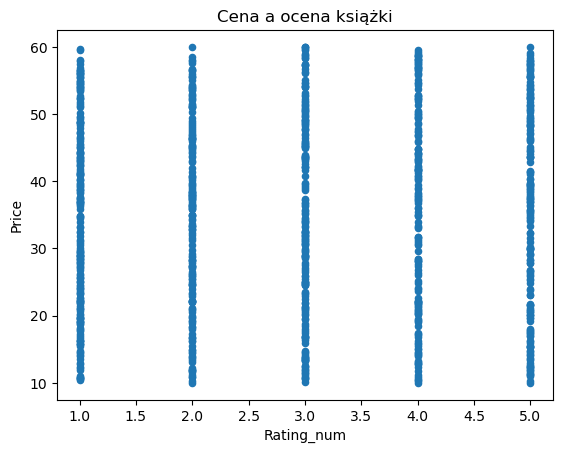

In [36]:
df.plot.scatter(x='Rating_num', y='Price', title='Cena a ocena książki')


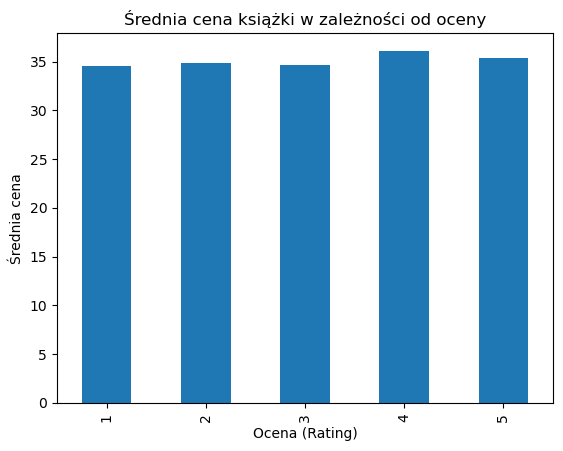

In [37]:
import matplotlib.pyplot as plt

df.groupby('Rating_num')['Price'].mean().plot(kind='bar', title='Średnia cena książki w zależności od oceny')
plt.xlabel('Ocena (Rating)')
plt.ylabel('Średnia cena')
plt.show()


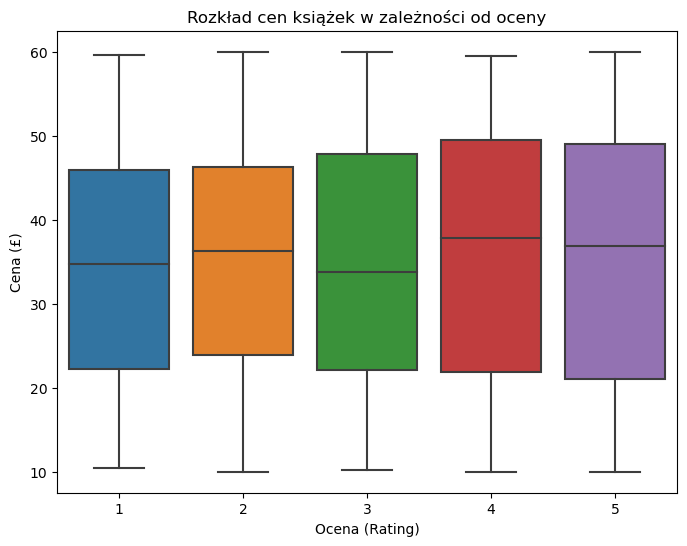

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating_num', y='Price', data=df)

plt.title('Rozkład cen książek w zależności od oceny')
plt.xlabel('Ocena (Rating)')
plt.ylabel('Cena (£)')
plt.show()


In [40]:
df[(df['Rating'] == 'Five') & (df['Price'] > 40)]



,Title,Price,Rating,Rating_num
4,Sapiens: A Brief History of Humankind,54.23,Five,5
13,Scott Pilgrim's Precious Little Life (Scott Pi...,52.29,Five,5
28,Worlds Elsewhere: Journeys Around Shakespeare’...,40.30,Five,5
42,Private Paris (Private #10),47.61,Five,5
46,"We Love You, Charlie Freeman",50.27,Five,5
...,...,...,...,...
915,The Tumor,41.56,Five,5
954,"Rat Queens, Vol. 1: Sass & Sorcery (Rat Queens...",46.96,Five,5
972,Kitchens of the Great Midwest,57.20,Five,5
979,"Fruits Basket, Vol. 1 (Fruits Basket #1)",40.28,Five,5


In [41]:
df[(df['Price'] >= 10) & (df['Price'] <= 20)]


,Title,Price,Rating,Rating_num
7,The Coming Woman: A Novel Based on the Life of...,17.93,Three,3
10,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99,Two,2
12,Set Me Free,17.46,Five,5
20,In Her Wake,12.84,One,1
30,The Four Agreements: A Practical Guide to Pers...,17.66,Five,5
...,...,...,...,...
938,The Complete Maus (Maus #1-2),10.64,Three,3
939,The Communist Manifesto,14.76,Three,3
943,Taking Shots (Assassins #1),18.88,Two,2
946,Sister Sable (The Mad Queen #1),13.33,Three,3


<Axes: title={'center': 'Histogram cen książek'}, ylabel='Frequency'>

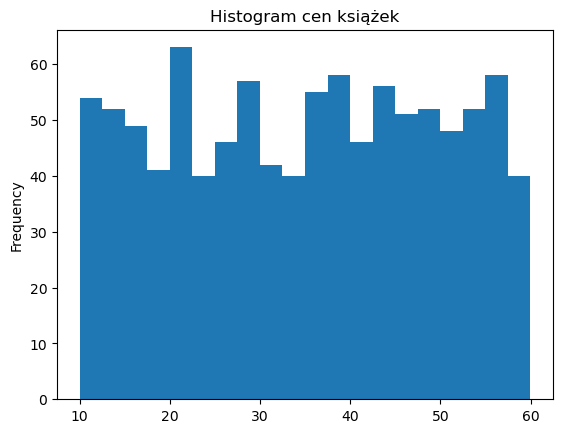

In [42]:
df['Price'].plot.hist(bins=20, title='Histogram cen książek')


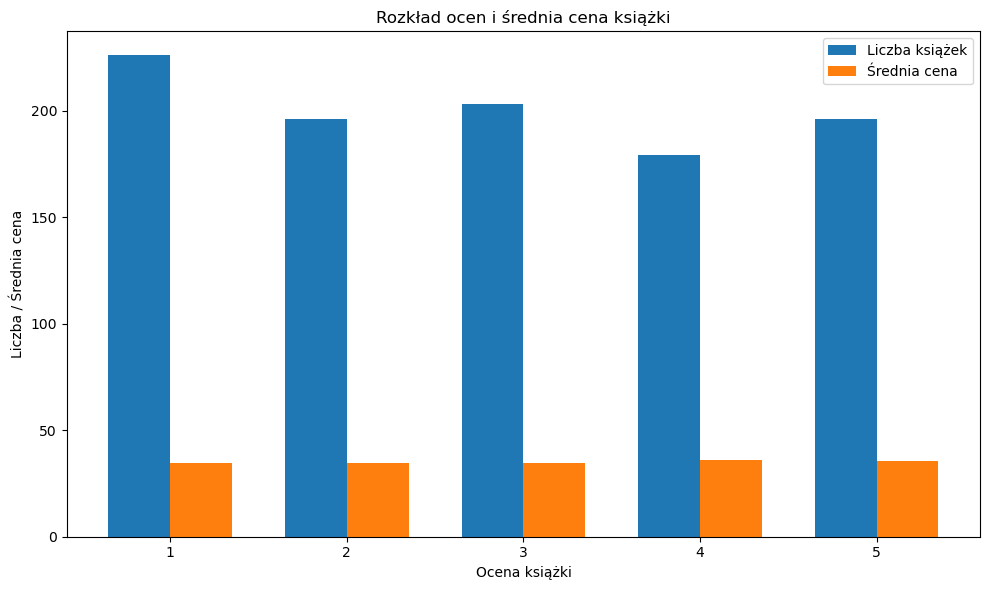

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Dane do wykresu
rating_counts = df['Rating_num'].value_counts().sort_index()
rating_avg_price = df.groupby('Rating_num')['Price'].mean()

# 2. Przygotuj pozycje słupków
x = np.arange(len(rating_counts))  # [0, 1, 2, 3, 4]
width = 0.35  # szerokość słupka

# 3. Tworzymy wykres
fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, rating_counts, width, label='Liczba książek')
bars2 = ax1.bar(x + width/2, rating_avg_price, width, label='Średnia cena')

# 4. Dodajemy opisy
ax1.set_xlabel('Ocena książki')
ax1.set_ylabel('Liczba / Średnia cena')
ax1.set_title('Rozkład ocen i średnia cena książki')
ax1.set_xticks(x)
ax1.set_xticklabels(rating_counts.index)
ax1.legend()

plt.tight_layout()
plt.show()
